## Library and Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import re
import numpy as np
import pandas as pd
import numpy as np
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
import nltk
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
data = pd.read_csv("D:/TA/Data/Data_6.csv")
df = data[['Tweet']]

print(df)

                                                   Tweet
0      Ribuan Warga Ikuti Gebyar PON 2024 Kapolda Sum...
1      Tim Polo Air Putri Jabar meraih emas di PON XX...
2      Danlanud Soewondo Turut Serta Sukseskan Pekan ...
3      Tim Baseball Jakarta Menang Telak Lawan Bali 2...
4      Hasil Sepakbola Putra PON XXI Aceh-Sumut 2024:...
...                                                  ...
29837  MMA Kls 77 Kg Putra PON XXI ACEH-SUMUT 2024 Ca...
29838  KEREN BANGEET!!! Selamat kepada Della Astriana...
29839                  Obama pon dame claim. Ni kn batik
29840  Agaknye Lg 5 tahun dlm air pulak dpe pacak kem...
29841  Ketua KONI Badung Made Nariana mengapresiasi p...

[29842 rows x 1 columns]


In [3]:
pp = pd.read_csv('preprocessing.csv')
pf = pp[['text']]
print(pf)

                                                text
0  siap siap banyak berita tentang carut-marutnya...
1  Yg gue suka dari pemain SulTeng adalah abis na...
2  Laga perempat final cabor sepak bola antara Ac...
3  Jd ini ga ada hubungannya dgn kinerja wasit kr...
4  Di sisi lain saya setuju tapi kalau wasitnya e...
5  Yg paling berat itu hrsnya hukuman bagi pengat...
6  Semua orang pada paham kalo atlet Sumbar emang...
7  Gue nggak sabar nunggu pertandingan futsal di ...
8  Gue dah liat rekaman pertandingan bola semalam...
9  Wasit yg sangat layak dapet bogem mentah dan b...


## Data Grouping


In [ ]:
# Tentukan path ke file RAR
rar_path = "Data.rar"

# Ekstrak file RAR
with rarfile.RarFile(rar_path) as rf:
    rf.extractall("extracted_files")

# Tentukan path ke folder hasil ekstraksi
extracted_path = "extracted_files/"

# Buat list untuk menyimpan DataFrame
df_list = []

# Baca setiap file CSV dan tambahkan ke list
for i in range(1, 30):
    filename = f"{extracted_path}{i}_sept.csv"
    df = pd.read_csv(filename)
    df_list.append(df)

# Gabungkan semua DataFrame dalam list menjadi satu DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

# Simpan DataFrame gabungan ke file CSV baru
combined_df.to_csv("Data_hmm.csv", index=False)

In [ ]:
# Menghitung frekuensi
combined_df = pd.read_csv("Data_6.csv")
frekuensi = combined_df['Tanggal'].value_counts().reset_index()
frekuensi.columns = ['Tanggal', 'Frekuensi']
# Mengubah kolom 'Tanggal' menjadi tipe datetime
frekuensi['Tanggal'] = pd.to_datetime(frekuensi['Tanggal'], format='mixed', dayfirst = True)
# Mengurutkan berdasarkan tanggal
frekuensi = frekuensi.sort_values('Tanggal')
# Menyimpan ke file .csv baru
frekuensi.to_csv('frekuensi_tanggal.csv', index=False)

## Pre-preprocessing

In [ ]:
import pandas as pd
import re

# Fungsi untuk menghapus username dan URL
def bersihkan_teks(text):
    # Menghapus username
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'@\w+', '', text)
    # Menghapus "https" dan kata setelahnya
    text = re.sub(r'https\S+', '', text)
    text = re.sub('[\s]+', ' ', text) #menghilangkan additional whitespace
    text = text.strip() #menghilangkan enter, tab, dll
    return text

df = pd.read_csv("Data_hmm.csv")

# Menerapkan fungsi ke kolom 'full_text'
df['full_text'] = df['full_text'].apply(bersihkan_teks)

# Menghapus tweet yang duplikat dan menyisakan satu saja
df = df.drop_duplicates(subset=['full_text'])

# Menyimpan hasil ke file .csv baru dengan kolom 'Tanggal' dan 'username' tetap ada
df[['created_at', 'username', 'full_text']].to_csv('Data_hmm_clean.csv', index=False)

print("Tweet yang duplikat telah dihapus dan hasilnya disimpan ke file Data_hmm_clean.csv")

## Eksplorasi Data

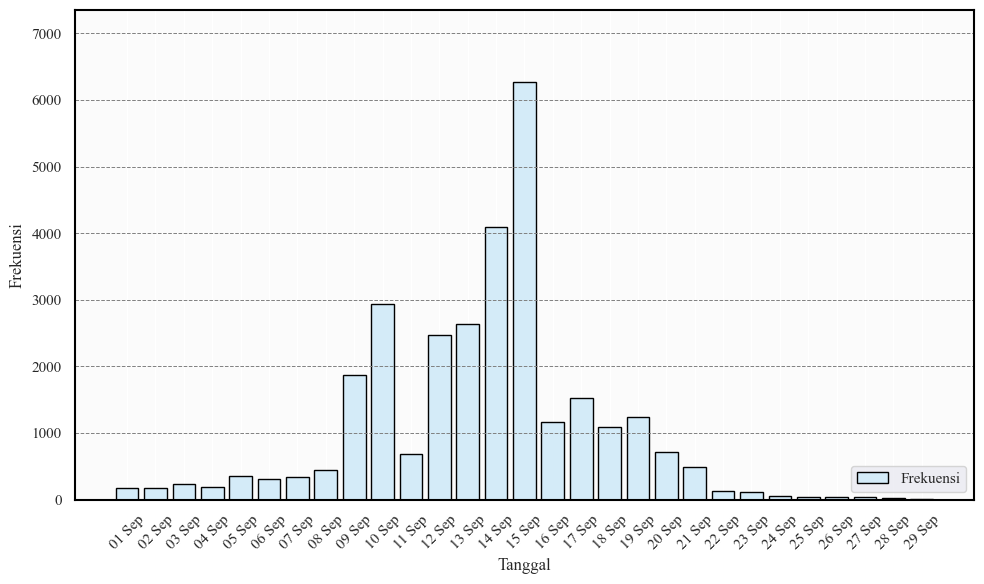

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Mengatur font default menjadi Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman'] + rcParams['font.serif']

# Konversi kolom 'Tanggal' ke format datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='mixed', dayfirst = True)

# Hitung frekuensi berdasarkan tanggal dan urutkan
frequency = data['Tanggal'].value_counts().sort_index()

# Buat garis tren menggunakan rolling average (opsional: bisa langsung pakai frekuensi juga)
trend = frequency.rolling(window=3, min_periods=1).mean()

# Plot barchart
plt.figure(figsize=(10, 6))
plt.bar(frequency.index, frequency.values, color='#D4EBF8', edgecolor='black', label='Frekuensi')

# Tambahkan garis horizontal putus-putus untuk setiap ribu
for y in range(1000, int(frequency.max()) + 1000, 1000):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)

# Format sumbu x agar hanya menampilkan tanggal
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d %b'))

# Ubah background menjadi warna FBFBFB
plt.gca().set_facecolor('#FBFBFB')

# Tambahkan garis layout berwarna hitam
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# Tambahkan label dan judul
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(frequency.index, rotation=45)  # Menampilkan setiap tanggal di bawah barplot

# Tambahkan legenda
plt.legend()
plt.tight_layout()

# Simpan plot sebagai file .jpg
plt.savefig('frekuensi_tanggal.jpg', format='jpg')

# Tampilkan plot
plt.show()

## Preprocessing

In [3]:
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from gensim.utils import simple_preprocess

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt')
nltk.download('stopwords')

from tqdm import tqdm
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

def regex(texts):
    texts = texts.lower()
    texts = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',texts) #remove symbol
    texts = re.sub('[\s]+', ' ', texts) #menghilangkan additional whitespace
    texts = re.sub(r'[^\w\s]','',texts) #remove punctuation
    texts = texts.strip() #menghilangkan enter, tab, dll
    return texts

def ka_handling(texts):
    tokens = texts.split()
    for i,token in enumerate(tokens):
        if token in ka.keys():
            tokens[i] = ka[token]
    return ''.join(' '.join(x for x in tokens))


ka = pd.read_csv('D:/TA/Data/kamus_alay.csv', encoding = "ISO-8859-1", header=None)
ka.columns = ['matab','mantap']
ka = {ka.matab[i]:ka.mantap[i] for i in range(0,len(ka.matab.values))}

def all_preproc(input_data):
    preproc = list(map(regex, input_data.values))
    preproc = list(map(ka_handling, preproc))
    return preproc

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\habib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\habib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = all_preproc(df['Tweet'])
print(data)

['ribuan warga ikuti gebyar pon 2024 kapolda sumatera utara ayo sukseskan pon', 'tim polo air putri jawa barat meraih emas di pon xxi 2024 kemenangan ini mengakhiri dominasi dki jakarta di cabang olahraga tersebut', 'danlanud soewondo turut serta sukseskan pekan olahraga nasional pon xxi aceh sumatera utara 2024', 'tim baseball jakarta menang telak lawan bali 23 0 di pon 2024', 'hasil sepakbola putra pon xxi aceh sumatera utara 2024 jawa tengah gagal kalahkan sulawesi barat', 'raih poin penuh tim futsal putra papua pegunungan taklukkan sulawesi selatan 3 1 di pon 2024', 'hasil sepak bola pon 2024 dramatis duel papua barat vs sulawesi tengah berakhir imbang', 'jawa barat raih emas pertama pada pon xxi aceh sumatera utara 2024', 'raih poin penuh tim futsal putra papua pegunungan taklukkan sulawesi selatan 3 1 di pon 2024', 'setiap venue pon 2024 dilengkapi tim rescue masyarakat bisa adukan masalah ke wa curhat kapolresta', 'shalom share berkat tuhan', 'saleum kementerian perhubungan mela

In [ ]:
# stan = all_preproc(pf['text'])
# print(stan)

['siap siap banyak berita tentang carut marutnya pon 2024 tunggu saja apa yang akan terjadi tidak usah kagetan ya', 'yang saya suka dari pemain sulawesi tengah adalah habis pukul wasit si pemain menunjukkan gestur bukan saya', 'laga perempat final cabang olahraga sepak bola antara aceh vs sulawesi tengah wasit dipukul pemain sulawesi tengah', 'jadi ini tidak ada hubungannya dengan kinerja wasit karena tidak ada yang salah dengan wasit tetapi lebih kepada peradaban mereka yang sudah berada dilevel yang berbeda', 'di sisi lain saya setuju tapi kalau wasitnya tidak benar baru saya tidak setuju seperti penegak hukum di indonesia harusnya jadi wasit yang benar bukan aturannya menguntungkan penguasa negeri ini', 'yang paling berat itu harus hukuman bagi pengaturan skor wasit amp pengorder', 'semua orang pada paham kalau atlet sumatera barat memang gacor di pon xxi 2024 aceh sumatera utara', 'saya tidak sabar tunggu pertandingan futsal di hari ke 4 pon xxi 2024 aceh sumatera utara pasti seru'

In [ ]:
# import pandas as pd

# # Mengubah list menjadi DataFrame
# df_stan = pd.DataFrame(stan, columns=['Processed Text'])

# # Menyimpan DataFrame ke file CSV
# df_stan.to_csv('standarization.csv', index=False)

# print("DataFrame berhasil disimpan sebagai standarization.csv")

DataFrame berhasil disimpan sebagai standarization.csv


In [28]:
# nltk.download('stopwords')
# stop_words = stopwords.words('indonesian')
# stop_words.extend(['jalaluddin', 'take', 'amp', 'ya'])

In [13]:
stopwords = pd.read_csv('D:/TA/Data/stop_words.csv')
stop_words = stopwords['Stop Words'].tolist()

In [6]:
# Create a stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# df2 = data.values.tolist()

In [7]:
import gensim
import gensim.corpora as corpora
import nltk
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(data))

print(data_words[:1])

[['ribuan', 'warga', 'ikuti', 'gebyar', 'pon', 'kapolda', 'sumatera', 'utara', 'ayo', 'sukseskan', 'pon']]


In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=15, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=5)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[101]]])

['barongsai', 'sumatera_barat', 'targetkan', 'medali_emas', 'di', 'pon_xxi']


In [9]:
# Fungsi untuk menghapus stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Misalnya, fungsi pembentukan bigram (sesuaikan dengan pustaka bigram yang Anda gunakan)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def stemming(texts):
    texts_out = []
    for sent in texts:
        texts_out.append([stemmer.stem(word) for word in sent])
    return texts_out

In [10]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Do lemmatization keeping only noun, adj, vb, adv
data_stemming = stemming(data_words_nostops)

# Form Bigrams
data_words_bigrams = make_bigrams(data_stemming)

# Form Trigrams
data_words_trigrams = make_trigrams(data_words_bigrams)

print(data_words_trigrams[1])

['tim', 'polo_air', 'putri_jawa_barat', 'raih_emas', 'pon_xxi', 'menang', 'dominasi', 'dki_jakarta', 'cabang_olahraga']


In [11]:
print(data_words_trigrams[:2])

[['ribu', 'warga', 'ikut', 'gebyar', 'pon', 'kapolda_sumatera_utara', 'sukses', 'pon'], ['tim', 'polo_air', 'putri_jawa_barat', 'raih_emas', 'pon_xxi', 'menang', 'dominasi', 'dki_jakarta', 'cabang_olahraga']]


In [12]:
data_stemming_1 = data_words_trigrams

data_fix = data_stemming_1

## TFIDF

In [ ]:
# Gabungkan setiap dokumen menjadi string
data_sentences = [' '.join(words) for words in data_words_trigrams]

# Inisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = vectorizer.fit_transform(data_sentences)

# Mendapatkan fitur (kata unik)
feature_names = vectorizer.get_feature_names_out()

# Mencari nilai TF, IDF, dan TF-IDF untuk kata "berita" di dokumen ke-41
word = "berita"
document_index = 40  # Baris ke-41 (indeks ke-40 karena Python menggunakan zero-indexing)

if word in feature_names:
    # Hitung IDF untuk kata
    word_index = feature_names.tolist().index(word)
    idf_value = vectorizer.idf_[word_index]  # Mengambil nilai IDF langsung dari TfidfVectorizer
    
    # Hitung TF untuk dokumen ke-41
    doc_words = data_sentences[document_index].split()  # Ambil kata-kata di dokumen ke-41
    word_count = doc_words.count(word)  # Jumlah kemunculan kata "berita"
    total_words = len(doc_words)  # Total kata dalam dokumen ke-41
    tf_value = word_count / total_words if total_words > 0 else 0  # Nilai TF

    # Hitung TF-IDF
    tfidf_value = tf_value * idf_value  # Nilai TF-IDF

    # Output hasil
    print(f"Kata: '{word}'")
    print(f"TF di dokumen ke-{document_index + 1}: {tf_value}")
    print(f"IDF di seluruh dokumen: {idf_value}")
    print(f"TF-IDF di dokumen ke-{document_index + 1}: {tfidf_value}")
    print(len(doc_words))
else:
    print(f"Kata '{word}' tidak ditemukan dalam teks.")

Kata: 'berita'
TF di dokumen ke-41: 0.16666666666666666
IDF di seluruh dokumen: 6.837797466802718
TF-IDF di dokumen ke-41: 1.1396329111337864
6


In [30]:
len(data_words_trigrams)

29842

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Menggabungkan kata-kata dalam setiap list menjadi satu string
data_words_joined = [' '.join(words) for words in data_words_trigrams]

# Membuat objek TfidfVectorizer
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF
X = vectorizer.fit_transform(data_words_joined)

# Mengubah hasil menjadi DataFrame
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Menambahkan kolom nomor dokumen
df_tfidf.insert(0, 'Nomor Dokumen', range(1, 1 + len(df_tfidf)))

# Menampilkan hasil
print(df_tfidf)

       Nomor Dokumen   aa  aamiin  aang   ab  abadi  abah  abai  abal  abang  \
0                  1  0.0     0.0   0.0  0.0    0.0   0.0   0.0   0.0    0.0   
1                  2  0.0     0.0   0.0  0.0    0.0   0.0   0.0   0.0    0.0   
2                  3  0.0     0.0   0.0  0.0    0.0   0.0   0.0   0.0    0.0   
3                  4  0.0     0.0   0.0  0.0    0.0   0.0   0.0   0.0    0.0   
4                  5  0.0     0.0   0.0  0.0    0.0   0.0   0.0   0.0    0.0   
...              ...  ...     ...   ...  ...    ...   ...   ...   ...    ...   
29837          29838  0.0     0.0   0.0  0.0    0.0   0.0   0.0   0.0    0.0   
29838          29839  0.0     0.0   0.0  0.0    0.0   0.0   0.0   0.0    0.0   
29839          29840  0.0     0.0   0.0  0.0    0.0   0.0   0.0   0.0    0.0   
29840          29841  0.0     0.0   0.0  0.0    0.0   0.0   0.0   0.0    0.0   
29841          29842  0.0     0.0   0.0  0.0    0.0   0.0   0.0   0.0    0.0   

       ...  zoning  zuklifli  zukur  zu

In [23]:
import pandas as pd

# Memilih kolom yang diinginkan
df_tfidf = df_tfidf[['Nomor Dokumen', 'berita']]

# Menyimpan DataFrame ke file Excel
df_tfidf.to_excel('df_tfidf_selected.xlsx', index=False)

print("DataFrame berhasil disimpan ke dalam file tf_matrix_selected.xlsx")

DataFrame berhasil disimpan ke dalam file tf_matrix_selected.xlsx


## Looking for best num topics

In [ ]:
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
import numpy as np
import pandas as pd

# Corpus dan Dictionary
dictionary = corpora.Dictionary(data_fix)
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=1000000)

# Create Dictionary
id2word = corpora.Dictionary(data_fix)

corpus = [dictionary.doc2bow(doc) for doc in data_fix]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Daftar untuk menyimpan nilai coherence score
coherence_scores = []

# Uji dengan berbagai jumlah topik
num_topics_list = range(1, 11)

for num_topics in num_topics_list:
    scores = []
    for _ in range(5):  # Ulangi model beberapa kali
        lda_model_tfidf = gensim.models.LdaModel(
            corpus=corpus_tfidf,
            id2word=dictionary,
            num_topics=num_topics,
            random_state= 100,  # Nilai acak dinamis
            update_every=1,
            chunksize=100,  # Ukuran batch bervariasi
            passes=20,
            alpha='symmetric',  # Coba nilai tetap
            per_word_topics=True
        )
        coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=data_fix, dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        scores.append(coherence_score)
    
    # Simpan rata-rata dan standar deviasi
    mean_score = np.mean(scores)
    std_dev = np.std(scores)
    coherence_scores.append({'Num_Topics': num_topics, 'Mean_Coherence_Score': mean_score, 'Std_Dev': std_dev})
    print(f'Jumlah Topik: {num_topics}, Rata-rata Coherence Score: {mean_score:.4f}, Standar Deviasi: {std_dev:.4f}')

# Simpan ke DataFrame
df_coherence = pd.DataFrame(coherence_scores)



Jumlah Topik: 1, Rata-rata Coherence Score: 0.6029, Standar Deviasi: 0.0000
Jumlah Topik: 2, Rata-rata Coherence Score: 0.6364, Standar Deviasi: 0.0000
Jumlah Topik: 3, Rata-rata Coherence Score: 0.6362, Standar Deviasi: 0.0000
Jumlah Topik: 4, Rata-rata Coherence Score: 0.6209, Standar Deviasi: 0.0000
Jumlah Topik: 5, Rata-rata Coherence Score: 0.6513, Standar Deviasi: 0.0000
Jumlah Topik: 6, Rata-rata Coherence Score: 0.6582, Standar Deviasi: 0.0000
Jumlah Topik: 7, Rata-rata Coherence Score: 0.6537, Standar Deviasi: 0.0000
Jumlah Topik: 8, Rata-rata Coherence Score: 0.6433, Standar Deviasi: 0.0000
Jumlah Topik: 9, Rata-rata Coherence Score: 0.6501, Standar Deviasi: 0.0000
Jumlah Topik: 10, Rata-rata Coherence Score: 0.6459, Standar Deviasi: 0.0000


In [13]:
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
import numpy as np
import pandas as pd

# Corpus dan Dictionary
dictionary = corpora.Dictionary(data_fix)
dictionary.filter_extremes(keep_n=1000000)

# Create Dictionary
id2word = corpora.Dictionary(data_fix)

corpus = [dictionary.doc2bow(doc) for doc in data_fix]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Daftar untuk menyimpan nilai coherence score
coherence_scores = []

# Uji dengan berbagai jumlah topik
num_topics_list = range(1, 11)

for num_topics in num_topics_list:
    scores = []
    for _ in range(5):  # Ulangi model beberapa kali
        lda_model_tfidf = gensim.models.LdaModel(
            corpus=corpus_tfidf,
            id2word=dictionary,
            num_topics=num_topics,
            random_state= 100,  # Nilai acak dinamis
            update_every=1,
            chunksize=100,  # Ukuran batch bervariasi
            passes=20,
            alpha='symmetric',  # Coba nilai tetap
            per_word_topics=True
        )
        coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=data_fix, dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        scores.append(coherence_score)
    
    # Simpan rata-rata dan standar deviasi
    mean_score = np.mean(scores)
    std_dev = np.std(scores)
    coherence_scores.append({'Num_Topics': num_topics, 'Mean_Coherence_Score': mean_score, 'Std_Dev': std_dev})
    print(f'Jumlah Topik: {num_topics}, Rata-rata Coherence Score: {mean_score:.4f}, Standar Deviasi: {std_dev:.4f}')

# Simpan ke DataFrame
df_coherence = pd.DataFrame(coherence_scores)

Jumlah Topik: 1, Rata-rata Coherence Score: 0.4781, Standar Deviasi: 0.0000
Jumlah Topik: 2, Rata-rata Coherence Score: 0.5579, Standar Deviasi: 0.0000
Jumlah Topik: 3, Rata-rata Coherence Score: 0.5706, Standar Deviasi: 0.0000
Jumlah Topik: 4, Rata-rata Coherence Score: 0.5623, Standar Deviasi: 0.0000
Jumlah Topik: 5, Rata-rata Coherence Score: 0.5707, Standar Deviasi: 0.0000
Jumlah Topik: 6, Rata-rata Coherence Score: 0.6013, Standar Deviasi: 0.0000
Jumlah Topik: 7, Rata-rata Coherence Score: 0.5687, Standar Deviasi: 0.0000
Jumlah Topik: 8, Rata-rata Coherence Score: 0.5977, Standar Deviasi: 0.0000
Jumlah Topik: 9, Rata-rata Coherence Score: 0.5987, Standar Deviasi: 0.0000
Jumlah Topik: 10, Rata-rata Coherence Score: 0.6139, Standar Deviasi: 0.0000


In [14]:
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
import numpy as np
import pandas as pd

# Corpus dan Dictionary
dictionary = corpora.Dictionary(data_fix)
dictionary.filter_extremes(no_below=30, no_above=0.1, keep_n=1000000)

# Create Dictionary
id2word = corpora.Dictionary(data_fix)

corpus = [dictionary.doc2bow(doc) for doc in data_fix]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Daftar untuk menyimpan nilai coherence score
coherence_scores = []

# Uji dengan berbagai jumlah topik
num_topics_list = range(1, 11)

for num_topics in num_topics_list:
    scores = []
    for _ in range(5):  # Ulangi model beberapa kali
        lda_model_tfidf = gensim.models.LdaModel(
            corpus=corpus_tfidf,
            id2word=dictionary,
            num_topics=num_topics,
            random_state= 100,  # Nilai acak dinamis
            update_every=1,
            chunksize=100,  # Ukuran batch bervariasi
            passes=20,
            alpha='symmetric',  # Coba nilai tetap
            per_word_topics=True
        )
        coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=data_fix, dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        scores.append(coherence_score)
    
    # Simpan rata-rata dan standar deviasi
    mean_score = np.mean(scores)
    std_dev = np.std(scores)
    coherence_scores.append({'Num_Topics': num_topics, 'Mean_Coherence_Score': mean_score, 'Std_Dev': std_dev})
    print(f'Jumlah Topik: {num_topics}, Rata-rata Coherence Score: {mean_score:.4f}, Standar Deviasi: {std_dev:.4f}')

# Simpan ke DataFrame
df_coherence = pd.DataFrame(coherence_scores)

Jumlah Topik: 1, Rata-rata Coherence Score: 0.5176, Standar Deviasi: 0.0000
Jumlah Topik: 2, Rata-rata Coherence Score: 0.5894, Standar Deviasi: 0.0000
Jumlah Topik: 3, Rata-rata Coherence Score: 0.6059, Standar Deviasi: 0.0000
Jumlah Topik: 4, Rata-rata Coherence Score: 0.6176, Standar Deviasi: 0.0000
Jumlah Topik: 5, Rata-rata Coherence Score: 0.6204, Standar Deviasi: 0.0000
Jumlah Topik: 6, Rata-rata Coherence Score: 0.6185, Standar Deviasi: 0.0000
Jumlah Topik: 7, Rata-rata Coherence Score: 0.6512, Standar Deviasi: 0.0000
Jumlah Topik: 8, Rata-rata Coherence Score: 0.6411, Standar Deviasi: 0.0000
Jumlah Topik: 9, Rata-rata Coherence Score: 0.6447, Standar Deviasi: 0.0000
Jumlah Topik: 10, Rata-rata Coherence Score: 0.6363, Standar Deviasi: 0.0000


In [75]:
df_coherence.to_excel('lda_coherence_scores.xlsx', index=False)

print("Model LDA selesai, dan hasil coherence score disimpan ke 'lda_coherence_scores.xlsx'")

Model LDA selesai, dan hasil coherence score disimpan ke 'lda_coherence_scores.xlsx'


## LDA

In [ ]:
# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('gebyar', 1),
  ('ikut', 2),
  ('kapolda_sumatera_utara', 1),
  ('pon', 1),
  ('ribu', 1)]]

In [18]:
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=dictionary,
#                                            num_topics=10,
#                                            random_state=42,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=20,
#                                            alpha='auto',
#                                            per_word_topics=True
#                                         )

In [23]:
import pandas as pd
from gensim.corpora import Dictionary

# Buat dictionary
dictionary = Dictionary(data_fix)
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=1000000)

# Simpan dictionary ke dalam DataFrame
df = pd.DataFrame(list(dictionary.items()), columns=['ID', 'Word'])

# Simpan DataFrame ke dalam file CSV
df.to_csv('dictionary.csv', index=False)

print("Dictionary telah disimpan ke dalam dictionary.csv")


Dictionary telah disimpan ke dalam dictionary.csv


In [12]:
dictionary = gensim.corpora.Dictionary(data_fix)
dictionary.filter_extremes(no_below=15, no_above = 0.1, keep_n=1000000)

# Create Dictionary
id2word = corpora.Dictionary(data_fix)

# Create Corpus
texts = data_fix

# corpus = [id2word.doc2bow(text) for text in texts]
corpus = [dictionary.doc2bow(doc) for doc in data_fix]

from gensim import corpora, models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]
corpus = [dictionary.doc2bow(doc) for doc in data_fix]

lda_model_tfidf = gensim.models.ldamodel.LdaModel(corpus_tfidf,
                                           id2word=dictionary,
                                           num_topics=6,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha='symmetric',
                                           per_word_topics=True
                                        )

print('\nPerplexity: ', lda_model_tfidf.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.

coherence_model_lda_tfidf = CoherenceModel(model=lda_model_tfidf, texts=data_fix, dictionary=id2word, coherence='c_v')
coherence_lda_tfidf = coherence_model_lda_tfidf.get_coherence()
print('\nCoherence Score: ', coherence_lda_tfidf)


Perplexity:  -8.42686145379784

Coherence Score:  0.6582460718591826


In [12]:
dictionary = gensim.corpora.Dictionary(data_fix)

# Create Dictionary
id2word = corpora.Dictionary(data_fix)

# Create Corpus
texts = data_fix

# corpus = [id2word.doc2bow(text) for text in texts]
corpus = [dictionary.doc2bow(doc) for doc in data_fix]

from gensim import corpora, models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]
corpus = [dictionary.doc2bow(doc) for doc in data_fix]

lda_model_tfidf = gensim.models.ldamodel.LdaModel(corpus_tfidf,
                                           id2word=dictionary,
                                           num_topics=6,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha='symmetric',
                                           per_word_topics=True
                                        )

print('\nPerplexity: ', lda_model_tfidf.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.

coherence_model_lda_tfidf = CoherenceModel(model=lda_model_tfidf, texts=data_fix, dictionary=id2word, coherence='c_v')
coherence_lda_tfidf = coherence_model_lda_tfidf.get_coherence()
print('\nCoherence Score: ', coherence_lda_tfidf)


Perplexity:  -10.017137570095272

Coherence Score:  0.3205932507964018


In [13]:
optimal_model_tfidf = lda_model_tfidf

model_topics = optimal_model_tfidf.show_topics(formatted=False)
pprint(optimal_model_tfidf.print_topics(num_words=10))

[(0,
  '0.036*"tutup" + 0.032*"venue" + 0.024*"jabat" + '
  '0.021*"pekan_olahraga_nasional" + 0.019*"lawan" + 0.019*"raih_medali" + '
  '0.019*"acara" + 0.017*"hadir" + 0.015*"jalan" + 0.015*"capai"'),
 (1,
  '0.040*"venue" + 0.031*"baik" + 0.031*"tanding" + 0.029*"moga" + '
  '0.025*"selamat" + 0.023*"cabang_olahraga" + 0.022*"bangga" + 0.017*"lapang" '
  '+ 0.016*"iya" + 0.016*"mahasiswa"'),
 (2,
  '0.066*"korupsi" + 0.026*"seru" + 0.023*"jawa_barat" + 0.022*"menpora" + '
  '0.021*"medali" + 0.020*"jawa_timur" + 0.019*"main" + 0.016*"dana" + '
  '0.014*"polri" + 0.014*"oleh"'),
 (3,
  '0.031*"catur" + 0.030*"gelar" + 0.025*"bonus" + 0.024*"riah" + '
  '0.022*"laksana" + 0.022*"selenggara" + 0.021*"jawa_barat_juara" + '
  '0.021*"lengkap" + 0.019*"kontingen_jawa_barat" + 0.017*"tampil"'),
 (4,
  '0.056*"juara" + 0.043*"prestasi" + 0.033*"hasil" + 0.031*"bukti" + '
  '0.028*"menang" + 0.023*"banget" + 0.020*"raih" + 0.017*"sejarah" + '
  '0.015*"apresiasi" + 0.015*"momen"'),
 (5,
  '0

In [14]:
# Visualisasi LDA TFIDF
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.229175  0.332539       1        1  18.748643
0      0.065321 -0.238239       2        1  17.877293
1      0.218245 -0.130462       3        1  17.607509
5     -0.222170  0.008349       4        1  17.582011
4     -0.260528  0.127922       5        1  16.205396
3     -0.030043 -0.100108       6        1  11.979147, topic_info=                         Term         Freq        Total Category  logprob  \
1517                  korupsi  1920.000000  1920.000000  Default  30.0000   
42                      juara  1399.000000  1399.000000  Default  29.0000   
39                      venue  1948.000000  1948.000000  Default  28.0000   
158                  prestasi  1080.000000  1080.000000  Default  27.0000   
171                     tutup   998.000000   998.000000  Default  26.0000   
...                       ...          ...          ...      ...      ...   
3                       warga   138.030677   140.061400   Topic6  -4.8953   
24                      penuh   226.939458   377.292460   Topic6  -4.3981   
12    pekan_olahraga_nasional   269.443679   860.555187   Topic6  -4.2265   
74                     dukung   180.281752   798.374583   Topic6  -4.6283   
315                     ajang   148.345143  1142.974564   Topic6  -4.8233   

      loglift  
1517  30.0000  
42    29.0000  
39    28.0000  
158   27.0000  
171   26.0000  
...       ...  
3      2.1074  
24     1.6137  
12     0.9608  
74     0.6339  
315    0.0802  

[240 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
260       2  0.995536     acara
260       4  0.001933     acara
58        1  0.089774      aceh
58        2  0.160846      aceh
58        3  0.062094      aceh
...     ...       ...       ...
128       4  0.004079       via
3         4  0.007140     warga
3         6  0.985282     warga
293       2  0.987930  xxi_aceh
293       4  0.005092  xxi_aceh

[398 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 6, 5, 4])

In [27]:
optimal_model_tfidf = lda_model_tfidf

model_topics = optimal_model_tfidf.show_topics(formatted=False)
pprint(optimal_model_tfidf.print_topics(num_words=10))

[(0,
  '0.036*"tutup" + 0.032*"venue" + 0.024*"jabat" + '
  '0.021*"pekan_olahraga_nasional" + 0.019*"lawan" + 0.019*"raih_medali" + '
  '0.019*"acara" + 0.017*"hadir" + 0.015*"jalan" + 0.015*"capai"'),
 (1,
  '0.040*"venue" + 0.031*"baik" + 0.031*"tanding" + 0.029*"moga" + '
  '0.025*"selamat" + 0.023*"cabang_olahraga" + 0.022*"bangga" + 0.017*"lapang" '
  '+ 0.016*"iya" + 0.016*"mahasiswa"'),
 (2,
  '0.066*"korupsi" + 0.026*"seru" + 0.023*"jawa_barat" + 0.022*"menpora" + '
  '0.021*"medali" + 0.020*"jawa_timur" + 0.019*"main" + 0.016*"dana" + '
  '0.014*"polri" + 0.014*"oleh"'),
 (3,
  '0.031*"catur" + 0.030*"gelar" + 0.025*"bonus" + 0.024*"riah" + '
  '0.022*"laksana" + 0.022*"selenggara" + 0.021*"jawa_barat_juara" + '
  '0.021*"lengkap" + 0.019*"kontingen_jawa_barat" + 0.017*"tampil"'),
 (4,
  '0.056*"juara" + 0.043*"prestasi" + 0.033*"hasil" + 0.031*"bukti" + '
  '0.028*"menang" + 0.023*"banget" + 0.020*"raih" + 0.017*"sejarah" + '
  '0.015*"apresiasi" + 0.015*"momen"'),
 (5,
  '0

In [28]:
# Visualisasi LDA TFIDF
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.229175  0.332539       1        1  18.748835
0      0.065321 -0.238239       2        1  17.876980
1      0.218245 -0.130462       3        1  17.607129
5     -0.222170  0.008349       4        1  17.582411
4     -0.260528  0.127922       5        1  16.205430
3     -0.030043 -0.100108       6        1  11.979215, topic_info=                         Term         Freq        Total Category  logprob  \
1517                  korupsi  1920.000000  1920.000000  Default  30.0000   
42                      juara  1399.000000  1399.000000  Default  29.0000   
39                      venue  1948.000000  1948.000000  Default  28.0000   
158                  prestasi  1080.000000  1080.000000  Default  27.0000   
171                     tutup   998.000000   998.000000  Default  26.0000   
...                       ...          ...          ...      ...      ...   
3                       warga   138.031457   140.062181   Topic6  -4.8953   
24                      penuh   226.940740   377.295262   Topic6  -4.3981   
12    pekan_olahraga_nasional   269.445201   860.546404   Topic6  -4.2265   
74                     dukung   180.282770   798.389592   Topic6  -4.6283   
315                     ajang   148.345981  1142.988451   Topic6  -4.8233   

      loglift  
1517  30.0000  
42    29.0000  
39    28.0000  
158   27.0000  
171   26.0000  
...       ...  
3      2.1074  
24     1.6137  
12     0.9608  
74     0.6339  
315    0.0801  

[240 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
260       2  0.995553     acara
260       4  0.001933     acara
58        1  0.089774      aceh
58        2  0.160845      aceh
58        3  0.062093      aceh
...     ...       ...       ...
128       4  0.004079       via
3         4  0.007140     warga
3         6  0.985277     warga
293       2  0.987947  xxi_aceh
293       4  0.005093  xxi_aceh

[398 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 6, 5, 4])

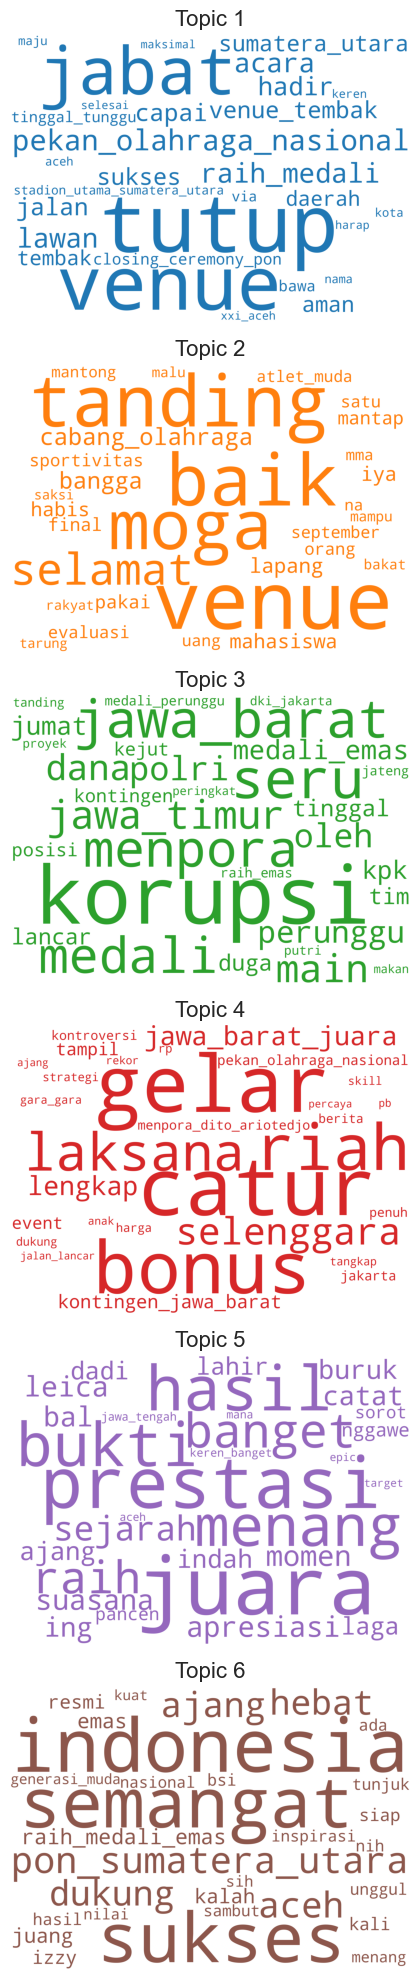

In [15]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_tfidf.show_topics(formatted=False,
                               num_words=30)

fig, axes = plt.subplots(6, 1, figsize=(10,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=500)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i + 1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [16]:
# Extract the data from the vis object
topic_coordinates = vis.topic_coordinates

# Display the principal component values
print(topic_coordinates)

# Save to Excel
topic_coordinates.to_excel('topic_coordinates.xlsx', index=False)

              x         y  topics  cluster       Freq
topic                                                
2      0.229175  0.332539       1        1  18.748643
0      0.065321 -0.238239       2        1  17.877293
1      0.218245 -0.130462       3        1  17.607509
5     -0.222170  0.008349       4        1  17.582011
4     -0.260528  0.127922       5        1  16.205396
3     -0.030043 -0.100108       6        1  11.979147


In [60]:
import pandas as pd

# Extract topics and words
model_topics = optimal_model_tfidf.show_topics(formatted=False)
topics_data = []

for topic_num, words in model_topics:
    words_str = ', '.join([f'{weight:.3f} "{word}"' for word, weight in words])
    topics_data.append([topic_num + 1, words_str])

# Create a DataFrame
df_topics = pd.DataFrame(topics_data, columns=['Topic', 'Words and Weights'])

# Save to Excel
df_topics.to_excel('lda_topics.xlsx', index=False)

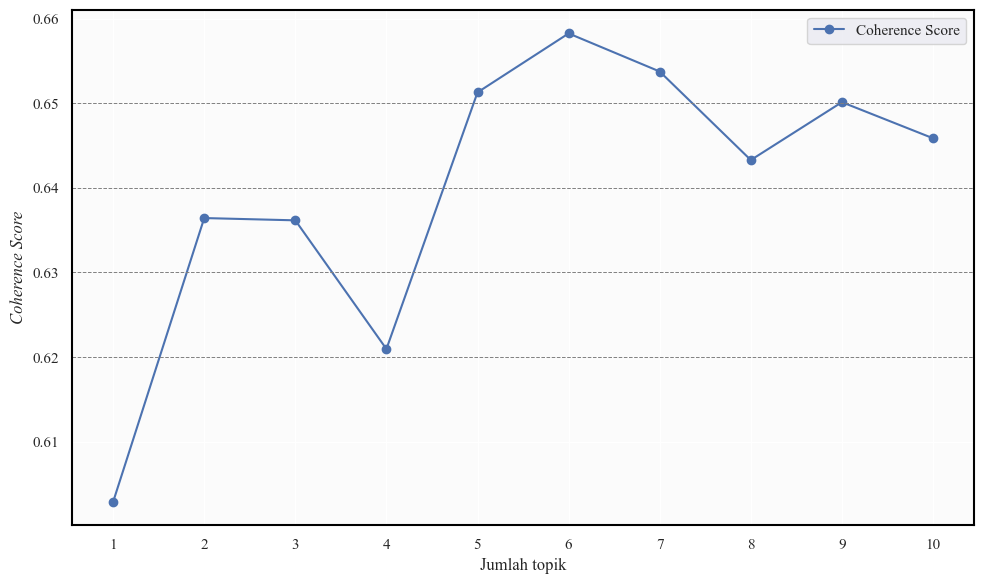

In [50]:
import matplotlib.pyplot as plt

# Data
num_topics = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
coherence_scores = [0.602885, 0.636424, 0.636154, 0.620947, 0.651278, 0.658246, 0.653743, 0.643280, 0.650121, 0.645855]

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(num_topics, coherence_scores, marker='o', linestyle='-', color='b')

# Ubah background menjadi warna FBFBFB
plt.gca().set_facecolor('#FBFBFB')

# Tambahkan garis layout berwarna hitam
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# Tambahkan garis horizontal putus-putus pada coherence score
for y in [0.62, 0.63, 0.64, 0.65]:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)

# Tambahkan label dan judul
plt.xlabel('Jumlah topik', fontsize=12)
plt.ylabel('Coherence Score', fontsize=12, fontstyle='italic')
plt.xticks(num_topics, rotation=0)

# Tambahkan legenda
plt.legend(['Coherence Score'])
plt.tight_layout()

# Show the chart
plt.grid(True)

# Simpan plot sebagai file .jpg
plt.savefig('number topics.jpg', format='jpg')

# Tampilkan plot
plt.show()

In [44]:
num_top = pd.read_excel("lda_coherence_scores.xlsx")

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Mengatur font default menjadi Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman'] + rcParams['font.serif']

# Konversi kolom 'Tanggal' ke format datetime
num_top['c'] = pd.to_datetime(data['Tanggal'], format='mixed', dayfirst = True)

# Hitung frekuensi berdasarkan tanggal dan urutkan
frequency = data['Tanggal'].value_counts().sort_index()

# Buat garis tren menggunakan rolling average (opsional: bisa langsung pakai frekuensi juga)
trend = frequency.rolling(window=3, min_periods=1).mean()

# Plot barchart
plt.figure(figsize=(10, 6))
plt.bar(frequency.index, frequency.values, color='#D4EBF8', edgecolor='black', label='Frekuensi')

# Tambahkan garis horizontal putus-putus untuk setiap ribu
for y in range(1000, int(frequency.max()) + 1000, 1000):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)

# Format sumbu x agar hanya menampilkan tanggal
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d %b'))

# Ubah background menjadi warna FBFBFB
plt.gca().set_facecolor('#FBFBFB')

# Tambahkan garis layout berwarna hitam
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# Tambahkan label dan judul
plt.title('Frekuensi Tweet berdasarkan Tanggal', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(frequency.index, rotation=45)  # Menampilkan setiap tanggal di bawah barplot

# Tambahkan legenda
plt.legend()
plt.tight_layout()

# Simpan plot sebagai file .jpg
plt.savefig('frekuensi_tanggal.jpg', format='jpg')

# Tampilkan plot
plt.show()

TypeError: list indices must be integers or slices, not str

In [24]:
# #pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]
# doc_lda_tfidf = lda_model[corpus_tfidf]

In [ ]:
# lda_model = gensim.models.LdaMulticore(corpus,
#                                            num_topics=10,
#                                            id2word=dictionary,
#                                            passes=10,
#                                            workers=2)

In [ ]:
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# coherence_model_lda = CoherenceModel(model=lda_model, texts=data_fix, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)

In [ ]:
# import pyLDAvis
# import pyLDAvis.gensim
# import gensim

# # Visualisasi LDA
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
# vis

In [ ]:
# optimal_model = lda_model

# model_topics = optimal_model.show_topics(formatted=False)
# pprint(optimal_model.print_topics(num_words=10))

## LDA Visual

In [67]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

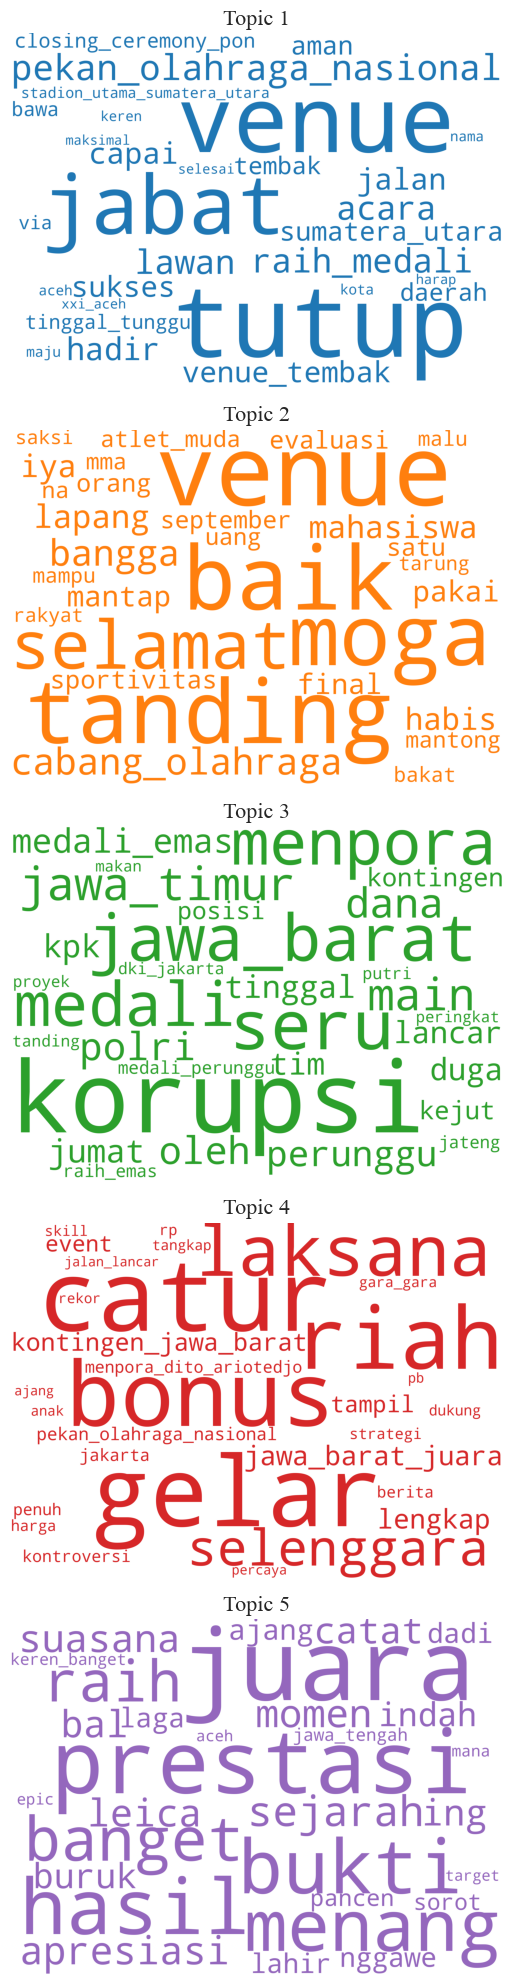

In [68]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_tfidf.show_topics(formatted=False,
                               num_words=30)

fig, axes = plt.subplots(5, 1, figsize=(10,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=500)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i + 1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## IDK TF IS THIS

In [12]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# Join the trigrams into a single string for each row
data = [' '.join(trigram) for trigram in data_words_trigrams]

# Create a DataFrame with a column named 'text'
df = pd.DataFrame(data, columns=['text'])

# Display the DataFrame
print(df)


                                                    text
0      ribu warga ikut gebyar pon kapolda_sumatera_ut...
1      tim polo_air putri_jawa_barat raih_emas pon_xx...
2      danlanud soewondo sukses pekan_olahraga_nasion...
3        tim baseball jakarta menang_telak lawan bal pon
4      hasil sepakbola_putra pon_xxi aceh_sumatera_ut...
...                                                  ...
29837  mma kls kg_putra pon_xxi aceh_sumatera_utara c...
29838  keren_banget selamat della astriana program_st...
29839                      obama pon dame claim kn batik
29840  agaknye dlm air pulak dpe pacak kemah lps nk m...
29841  ketua_koni badung made nariana apresiasi prest...

[29842 rows x 1 columns]


In [13]:
pd.options.plotting.backend = "plotly"
def doc_plot(bow,vectorizer,n=10,desc=True):
  feature_names = vectorizer.get_feature_names_out()
  bow_result_df = pd.DataFrame(bow.toarray())
  bow_result_df = bow_result_df.sum(axis=0).T.to_frame(name="BoW")
  bow_result_df["feature_names"] = feature_names
  if(desc):
    fig1 = bow_result_df.nlargest(n,"BoW").plot.barh(y="feature_names",x="BoW",text="BoW",text_auto=True)
  else:
    fig1 = bow_result_df.nsmallest(n,"BoW").plot.barh(y="feature_names",x="BoW",text="BoW",text_auto=True)
  fig1.update_traces(marker_color='darkblue')
  fig1.update_layout(yaxis={'categoryorder':'total ascending'})
  fig1.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
cv = CountVectorizer(lowercase=True)

# Fit and transform the text data
cv_features = cv.fit_transform(df['text'])

# Convert the result to a DataFrame for better visualization
cv_df = pd.DataFrame(cv_features.toarray(), columns=cv.get_feature_names_out())

In [19]:
print("Banyaknya document x banyaknya vocabulary")
print(cv_features.shape)

Banyaknya document x banyaknya vocabulary
(29842, 13872)


In [20]:
vocabulary = np.array(cv.get_feature_names_out())
print('Total Vocabulary Size:', len(vocabulary))

Total Vocabulary Size: 13872


In [23]:
from sklearn.decomposition import LatentDirichletAllocation

In [24]:
def optimal_components(X,list_of_n_components,random_state):
  result= pd.DataFrame()
  for n_components in list_of_n_components:
    lda_model = LatentDirichletAllocation(n_components=n_components,random_state=random_state)
    lda_model.fit(X)
    result = pd.concat([result,
                        pd.DataFrame({"n_components":[n_components],
                                      "log_likelihood_score":lda_model.score(X)})])
  return result

In [26]:
optimal_components(X=cv_features,
                   list_of_n_components=[5,10,15,20,25,30],
                   random_state=7)

n_components  log_likelihood_score
0             5         -1.631369e+06
0            10         -1.642615e+06
0            15         -1.643569e+06
0            20         -1.657444e+06
0            25         -1.659267e+06
0            30         -1.665391e+06

In [27]:
lda_model1 = LatentDirichletAllocation(n_components =30, random_state=7)
document_topics = lda_model1.fit_transform(cv_features)

In [28]:
topic_terms = lda_model1.components_

In [29]:
vocabulary2 = np.array(cv.get_feature_names_out())

In [30]:
top_terms = 20
TOTAL_TOPICS = 30
topic_key_term_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:, :top_terms]
topic_keyterms = vocabulary2[topic_key_term_idxs]
topics = [', '.join(topic) for topic in topic_keyterms]
pd.set_option('display.max_colwidth', 1)
topics_df1 = pd.DataFrame(topics,
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, TOTAL_TOPICS+1)])
topics_df1

Terms per Topic
Topic1   pon, venue, habis, baik, menpora, buruk, maksimal, atlet, bangun, infrastruktur, epic, tanding, selesai, kerja, banget, kesiap, event, top, jalan, becak_promosi                                                    
Topic2   wasit, pon, sulawesi_tengah, main, tengah, laga, pukul, pukul_wasit, aceh_vs_sulawesi, pssi, aceh, pon_xxi, ko, aceh_sumatera_utara, pusat, kontroversi, insiden, tinju, lawan, perhati                             
Topic3   aman, pon_xxi, jalan, fasilitas, atlet, pon, nyaman, sumatera_utara, jaga, laksana, baik, tanding, cetak, kirab_api_pon, hambat, venue, kendala, tni_polri, sambut, polda_sumatera_utara                            
Topic4   langsung, papua, pon, wasit, liga, tanding, sepakbola, live, gunung, tembak, bayar, jadwal, aceh_sumatera_utara, siar, video, vs, saksi, ambruk, shio, sportifitas_atlet                                            
Topic5   menang, pon_xxi, jawa_barat, tim, kalah, pon, lawan, aceh_sumatera_utara, hasil, jawa_timur, kalsel, raih, final, bukti, jawa_tengah, fokus, leica, semifinal, lampung, tanding                                     
Topic6   pon, tanding, seru, esport, venue, main, bakat, aceh_sumatera_utara, tonton, muda, cepat, catur, ajang, seru_banget, suasana, keu, tarik, mantong, penuh_aksi, prediksi                                             
Topic7   pon_xxi, aceh_sumatera_utara, sejarah, emas, rekor, raih_emas, atlet, pecah_rekor, prestasi, catat, cipta, hasil, bal, cabang_olahraga, putri, kenal, pon, leica, sinar, ukir                                       
Topic8   aceh_sumatera_utara, pon_xxi, masyarakat, dukung_penuh, pon, sukses, laksana, dukung, perintah, panitia, atlet_esport, tanding, selenggara, profesional, juang, peran, harap, kuat, hakim, prestasi_gemilang        
Topic9   aceh_sumatera_utara, pon_xxi, pekan_olahraga_nasional, september, pon, gelar, aceh, buka, atlet, medali_emas, banda_aceh, nomor, polri, selenggara, resmi, duga, emas, sumatera_utara, berita, cabang_olahraga      
Topic10  pon, korupsi, sportivitas, atlet, jabat, sportif, curang, pas, banget, wasit, kemarin, deh, junjung, kaya, iya, sejati, lawan, pakai, dana, jujur                                                                   
Topic11  pon, sumatera_utara, final, tanding, stadion, sepak_bola_pon, futsal, zona, jawa_barat, xxi_aceh, sepakbola_putri, xxi, aceh, voli, integritas, dki_jakarta, senjata, sepakbola_putra, free_fire, do                
Topic12  pon_xxi, daerah, penuh_semangat, aceh_sumatera_utara, atlet, selenggara, acara_olahraga, kualitas, pon, indonesia, laksana, tekad, ada, dukung_atlet, bangga, dedikasi, haru, dukung, tampil, atlet_sulawesi_selatan
Topic13  pon_xxi, hasil, aceh_sumatera_utara, tanding, saing, ketat, tarung, sengit, raih_medali_emas, ajang, solid, tunggu, tim, serta, strategi, baik, hubung, sports, rebut, beda                                         
Topic14  pon_xxi, atlet, aceh_sumatera_utara, semangat, ajang, satu, pon, prestasi, baik, indonesia, olahraga, bangsa, kuat, inspirasi, bangga, bukti, juara, tunjuk, nasional, semangat_juang                               
Topic15  jawa_timur, pon, buka, renang, air, juara, emas, pon_xxi, dominasi, atlet, hebat, hasil, ajang, aceh_sumatera_utara, perunggu, jawa_timur_tampil, mantap, tim, lengkap, gemilang                                    
Topic16  aceh, pon, apresiasi, perintah, presiden_jokowi, ajar, terima_kasih, harga, bukti_nyata, nyata, kunci, bentuk, komitmen, jokowi, kerja_keras, sumatra_utara, bal, hasil, evaluasi, warna                            
Topic17  pon_xxi, aceh_sumatera_utara, siap, lancar, pon, pasti, pln, jaring, listrik, dukung, matang, jaga, pasok, aman, lan, koneksi, kominfo, sukses, gelar, stabil                                                       
Topic18  medali, oleh, pon_xxi, pon, klasemen, posisi, dki_jakarta, puncak, aceh_sumatera_utara, jakarta, mata, performa, jawa_barat, tambah, update, wasit_bodoh, peringkat, kejar, cek, juara                   

In [31]:
pd.options.display.float_format = '{:,.3f}'.format
dt_df1 = pd.DataFrame(document_topics,
                     columns=['T'+str(i) for i in range(1, TOTAL_TOPICS+1)])
dt_df1.T

0     1     2     3     4     5     6     7     8     9  ...  29832  \
T1  0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.716  ... 0.148    
T2  0.004 0.003 0.005 0.004 0.004 0.003 0.120 0.008 0.003 0.003  ... 0.004    
T3  0.498 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.105  ... 0.004    
T4  0.004 0.003 0.005 0.004 0.004 0.222 0.284 0.008 0.222 0.003  ... 0.004    
T5  0.004 0.212 0.005 0.306 0.551 0.183 0.496 0.008 0.183 0.003  ... 0.004    
T6  0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T7  0.004 0.383 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T8  0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.097  ... 0.004    
T9  0.004 0.003 0.646 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T10 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.225    
T11 0.004 0.003 0.005 0.231 0.346 0.284 0.004 0.008 0.284 0.003  ... 0.004    
T12 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.167    
T13 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T14 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T15 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T16 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T17 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T18 0.004 0.104 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T19 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T20 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T21 0.004 0.003 0.221 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T22 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T23 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T24 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T25 0.004 0.214 0.005 0.351 0.004 0.137 0.004 0.008 0.137 0.003  ... 0.004    
T26 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    
T27 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.508 0.003 0.003  ... 0.352    
T28 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.258 0.003 0.003  ... 0.004    
T29 0.398 0.003 0.005 0.004 0.004 0.099 0.004 0.008 0.099 0.003  ... 0.004    
T30 0.004 0.003 0.005 0.004 0.004 0.003 0.004 0.008 0.003 0.003  ... 0.004    

     29833  29834  29835  29836  29837  29838  29839  29840  29841  
T1  0.002  0.470  0.002  0.203  0.001  0.002  0.005  0.002  0.002   
T2  0.087  0.004  0.061  0.004  0.132  0.002  0.005  0.002  0.002   
T3  0.002  0.004  0.002  0.004  0.001  0.061  0.005  0.002  0.002   
T4  0.002  0.004  0.002  0.004  0.151  0.002  0.005  0.075  0.002   
T5  0.864  0.004  0.812  0.004  0.358  0.002  0.005  0.002  0.002   
T6  0.002  0.004  0.080  0.004  0.001  0.002  0.005  0.785  0.002   
T7  0.002  0.004  0.002  0.004  0.001  0.002  0.005  0.002  0.121   
T8  0.002  0.004  0.002  0.226  0.001  0.002  0.005  0.002  0.517   
T9  0.002  0.004  0.002  0.004  0.001  0.002  0.005  0.002  0.091   
T10 0.002  0.004  0.002  0.004  0.001  0.002  0.005  0.002  0.002   
T11 0.002  0.413  0.002  0.004  0.001  0.002  0.005  0.002  0.002   
T12 0.002  0.004  0.002  0.177  0.001  0.002  0.005  0.002  0.002   
T13 0.002  0.004  0.002  0.004  0.001  0.416  0.005  0.002  0.002   
T14 0.002  0.004  0.002  0.004  0.001  0.002  0.005  0.002  0.110   
T15 0.002  0.004  0.002  0.004  0.118  0.002  0.862  0.076  0.002   
T16 0.002  0.004  0.002  0.004  0.001  0.235  0.005  0.002  0.065   
T17 0.002  0.004  0.002  0.004  0.001  0.002  0.005  0.002  0.002   
T18 0.002  0.004  0.002  0.004  0.001  0.002  0.005  0.002  0.055   
T19 0.002  0.004  0.002  0.004  0.001  0.002  0.005  0.002  0.002   
T20 0.002  0.004  0.002  0.161  0.001  0.002  0.005  0.002  0.002   
T21 0.002  0.004  0.002  0.004  0.001  0.002  0.005  0.002  0.002   
T22 0.002  0.004  0.002  0.004  0.001  0

In [32]:
pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_colwidth', 200)

max_contrib_topics = dt_df1.max(axis=0)
dominant_topics = max_contrib_topics.index
contrib_perc = max_contrib_topics.values
document_numbers = [dt_df1[dt_df1[t] == max_contrib_topics.loc[t]].index[0]
                       for t in dominant_topics]
documents = [df.iloc[i] for i in document_numbers]

results_df1 = pd.DataFrame({'Dominant Topic': dominant_topics, 'Contribution %': contrib_perc,
                          'Text Num': document_numbers, 'Topic': topics_df1['Terms per Topic'],
                          'Text Full': documents})
results_df1

Dominant Topic  Contribution %  Text Num  \
Topic1              T1         0.94630     25940   
Topic2              T2         0.96282     21379   
Topic3              T3         0.94912       296   
Topic4              T4         0.96420     21381   
Topic5              T5         0.96282       884   
Topic6              T6         0.96882      1190   
Topic7              T7         0.94912       808   
Topic8              T8         0.93958     26417   
Topic9              T9         0.95606      2577   
Topic10            T10         0.96133     21559   
Topic11            T11         0.96420      1198   
Topic12            T12         0.96979       699   
Topic13            T13         0.95606     24235   
Topic14            T14         0.90333     26540   
Topic15            T15         0.95167     24250   
Topic16            T16         0.96548      1786   
Topic17            T17         0.95397      1510   
Topic18            T18         0.93805       221   
Topic19            T19         0.95397       614   
Topic20            T20         0.95797     24976   
Topic21            T21         0.90333     25555   
Topic22            T22         0.96133       202   
Topic23            T23         0.91212     14825   
Topic24            T24         0.94314     24977   
Topic25            T25         0.91212       648   
Topic26            T26         0.93095      7432   
Topic27            T27         0.94912     26357   
Topic28            T28         0.95606      3801   
Topic29            T29         0.91944     25281   
Topic30            T30         0.96133     22259   

                                                                                                                                                                                                           Topic  \
Topic1                                          pon, venue, habis, baik, menpora, buruk, maksimal, atlet, bangun, infrastruktur, epic, tanding, selesai, kerja, banget, kesiap, event, top, jalan, becak_promosi   
Topic2                   wasit, pon, sulawesi_tengah, main, tengah, laga, pukul, pukul_wasit, aceh_vs_sulawesi, pssi, aceh, pon_xxi, ko, aceh_sumatera_utara, pusat, kontroversi, insiden, tinju, lawan, perhati   
Topic3                  aman, pon_xxi, jalan, fasilitas, atlet, pon, nyaman, sumatera_utara, jaga, laksana, baik, tanding, cetak, kirab_api_pon, hambat, venue, kendala, tni_polri, sambut, polda_sumatera_utara   
Topic4                                  langsung, papua, pon, wasit, liga, tanding, sepakbola, live, gunung, tembak, bayar, jadwal, aceh_sumatera_utara, siar, video, vs, saksi, ambruk, shio, sportifitas_atlet   
Topic5                           menang, pon_xxi, jawa_barat, tim, kalah, pon, lawan, aceh_sumatera_utara, hasil, jawa_timur, kalsel, raih, final, bukti, jawa_tengah, fokus, leica, semifinal, lampung, tanding   
Topic6                                   pon, tanding, seru, esport, venue, main, bakat, aceh_sumatera_utara, tonton, muda, cepat, catur, ajang, seru_banget, suasana, keu, tarik, mantong, penuh_aksi, prediksi   
Topic7                             pon_xxi, aceh_sumatera_utara, sejarah, emas, rekor, raih_emas, atlet, pecah_rekor, prestasi, catat, cipta, hasil, bal, cabang_olahraga, putri, kenal, pon, leica, sinar, ukir   
Topic8   aceh_sumatera_utara, pon_xxi, masyarakat, dukung_penuh, pon, sukses, laksana, dukung, perintah, panitia, atlet_esport, tanding, selenggara, profesional, juang, peran, harap, kuat, hakim, prestasi_...   
Topic9   aceh_sumatera_utara, pon_xxi, pekan_olahraga_nasional, september, pon, gelar, aceh, buka, atlet, medali_emas, banda_aceh, nomor, polri, selenggara, resmi, duga, emas, sumatera_utara, berita, caban...   
Topic10                                                        pon, korupsi, sportivitas, atlet, jabat, sportif, curang, pas, banget, wasit, kemarin, deh, junjung, kaya, iya, sejati, lawan, pakai, dana, jujur   
Topic11     pon, sumatera_utara, final, tanding, stadion, sepak

## Another Vis

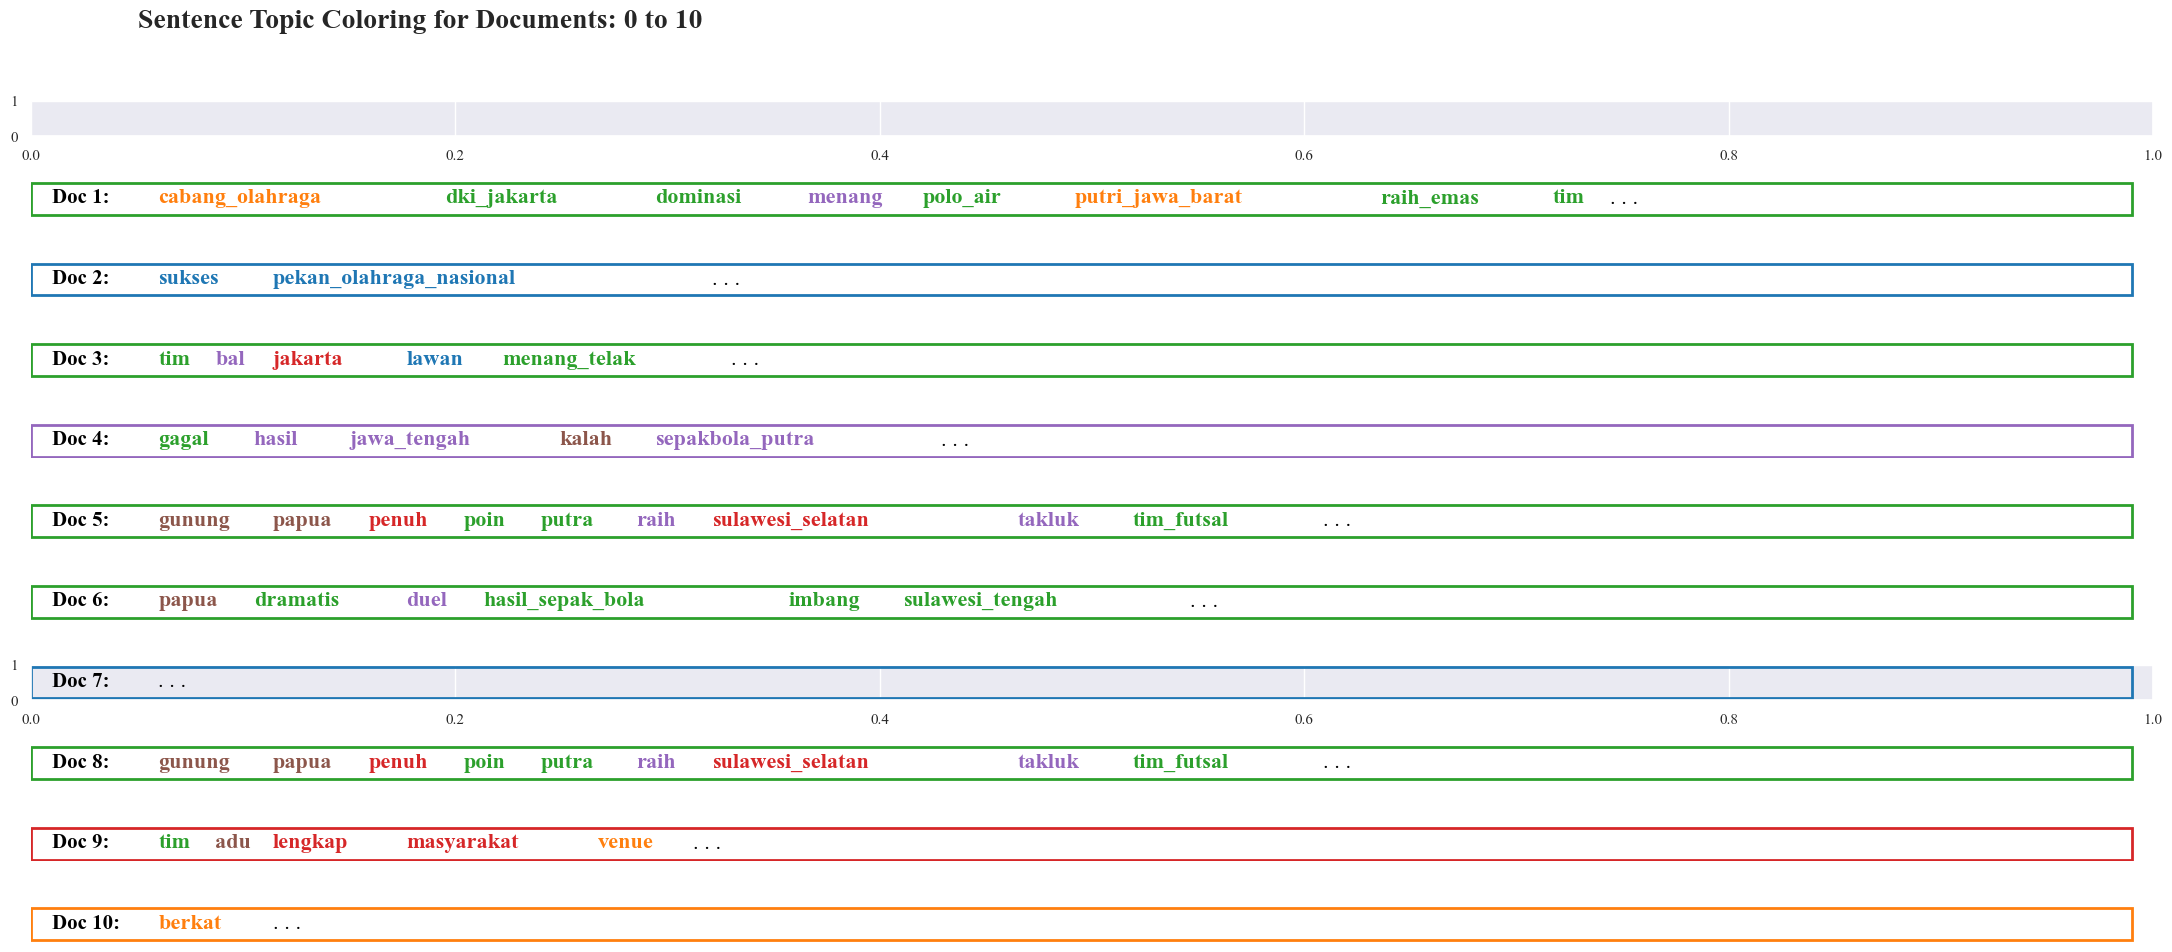

In [64]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

def sentences_chart(lda_model=lda_model_tfidf, corpus=corpus, start=0, end=12):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(22, 10))
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 1:
            corp_cur = corp[i-1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=15, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectangle
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += 0.009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=20, x=0.2, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [65]:
corp = corpus[0:13]
corp_cur = corp[13-1]
topic_percs, wordid_topics, wordid_phivalues = lda_model_tfidf[corp_cur]
word_dominanttopic = [(lda_model_tfidf.id2word[wd], topic[0]) for wd, topic in wordid_topics]
word_dominanttopic

[('kontingen', 2),
 ('perunggu', 2),
 ('september', 1),
 ('sumatera_selatan', 2),
 ('tanding', 1)]

In [66]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model_tfidf, corpus=corpus, end=-1)

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False)
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

NameError: name 'lda_model' is not defined

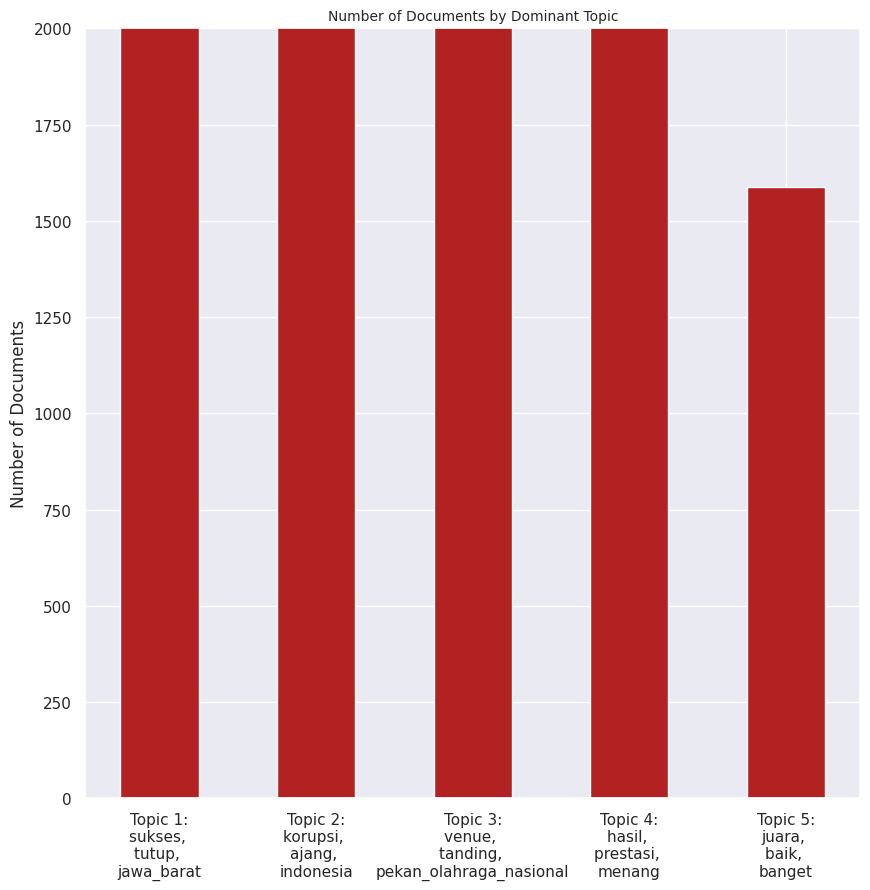

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot

fig, ax1  = plt.subplots(1, figsize=(10, 10))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x + 1)+ ':\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 2000)

plt.show()

In [ ]:
df_dominant_topic_in_each_doc

Dominant_Topic  count
0               0   6329
1               1   9912
2               2   9700
3               3   2959
4               4   1588

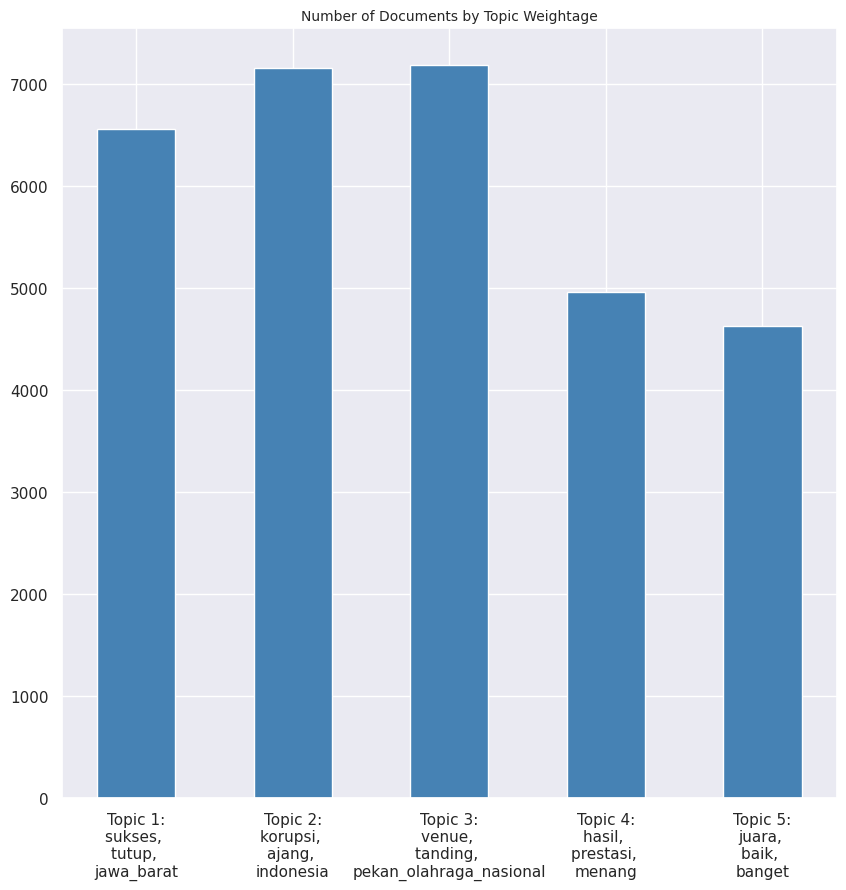

In [ ]:
fig, ax2  = plt.subplots(1, figsize=(10, 10))
# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [ ]:
def stemming(texts):
    texts_out = []
    for sent in texts:
        stemmed_words = [stemmer.stem(word) for word in sent]
        texts_out.append(" ".join(stemmed_words))
    return texts_out

In [ ]:
data_stemming = stemming(data_fix)

print(data_stemming[:2])

['ribu warga ikut gebyar pon kapolda sumut ayo sukses pon', 'tim polo air putri jawa barat raih emas pon xxi menang dominasi dki jakarta cabang olahraga']


In [ ]:
stop_words = stopwords.words('indonesian')
vectorizer = CountVectorizer(analyzer='word', min_df=10,                        # minimum reqd occurences of a word
                              stop_words=stop_words,             # remove stop words
                              lowercase=True,                   # convert all words to lowercase
                              token_pattern='[a-zA-Z0-9]{3,}'  # num chars > 3
                              # max_features=50000,             # max number of uniq words
                             )
data_vectorized = vectorizer.fit_transform(data_stemming)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [ ]:
%%time
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation(n_jobs=-1)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)


# Do the Grid Search
model.fit(data_vectorized)

CPU times: user 2min 46s, sys: 9.95 s, total: 2min 56s
Wall time: 1h 7min 38s


GridSearchCV(estimator=LatentDirichletAllocation(n_jobs=-1),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20, 25, 30]})

In [ ]:
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -345301.85904661496
Model Perplexity:  276.63850473052184


In [ ]:
categories = list(df.Dominant_Topic.unique())
categories

[2, 3, 1, 0, 4]

In [ ]:
print(df)

       Document_Id  Dominant_Topic
0                0               2
1                1               2
2                2               2
3                3               2
4                4               3
...            ...             ...
30483        30483               1
30484        30484               4
30485        30485               3
30486        30486               2
30487        30487               4

[30488 rows x 2 columns]


In [ ]:
#taking from https://www.kaggle.com/maksimeren/covid-19-literature-clustering
words = []
for ii in range(0,len(data)):
    words.append(str(data.iloc[ii]['full_text']).split(" "))


n_gram_all = []

for word in words:
    # get n-grams for the instance
    n_gram = []
    for i in range(len(word)-2+1):
        n_gram.append("".join(word[i:i+2]))
    n_gram_all.append(n_gram)

AttributeError: 'list' object has no attribute 'iloc'

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

# hash vectorizer instance
hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12)

# features matrix X
X = hvec.fit_transform(n_gram_all)

In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test = train_test_split(X.toarray(), test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

In [ ]:
from sklearn.cluster import KMeans

k = 15
kmeans = KMeans(n_clusters=k, n_jobs=4, verbose= k)
y_pred = kmeans.fit_predict(X_train)

In [ ]:
y_pred.shape

In [ ]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1)
X_embedded = tsne.fit_transform(X_train)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(10,10)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)

plt.title("t-SNE Covid-19 Articles")
# plt.savefig("plots/t-sne_covid19.png")
plt.show()

In [ ]:
X_embedded[:,1].shape

In [ ]:
# sns settings
sns.set(rc={'figure.figsize':(10,10)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
# plt.savefig("plots/t-sne_covid19_label.png")
plt.show()